# Anomalia magnética

## Carregando os dados

In [36]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [6]:
x, y, z, anom = np.loadtxt('anomalia-mag.txt', unpack=True)
shape = (50, 50)

<matplotlib.colorbar.Colorbar instance at 0x7fa4d3599710>

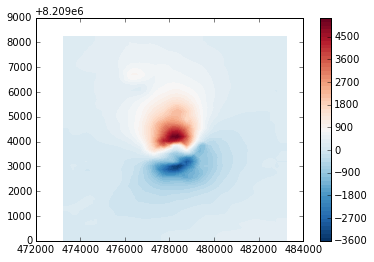

In [10]:
plt.tricontourf(y, x, anom, 60, cmap='RdBu_r')
plt.colorbar()

## Calcula o TGA

In [8]:
from fatiando.gravmag import transform

In [9]:
tga = transform.tga(x, y, anom, shape)

<matplotlib.colorbar.Colorbar instance at 0x7fa4d3366638>

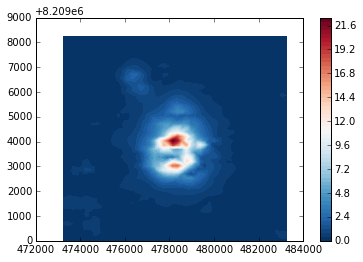

In [11]:
plt.tricontourf(y, x, tga, 60, cmap='RdBu_r')
plt.colorbar()

In [ ]:
transform.

## Desafio: Calcule a derivada vertical e o gradiente total horizontal

In [14]:
dx = transform.derivx(x, y, anom, shape)
dy = transform.derivy(x, y, anom, shape)
dz = transform.derivz(x, y, anom, shape)
thd = np.sqrt(dx**2 + dy**2)

<matplotlib.colorbar.Colorbar instance at 0x7fa4d3134320>

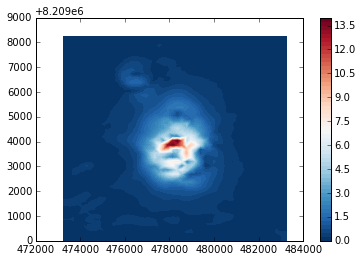

In [13]:
plt.tricontourf(y, x, thd, 60, cmap='RdBu_r')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fa4d2e8db90>

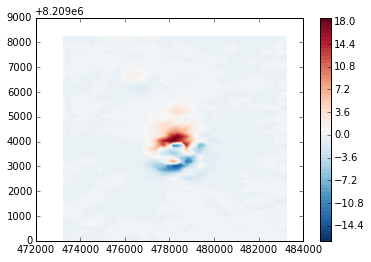

In [15]:
plt.tricontourf(y, x, dz, 60, cmap='RdBu_r')
plt.colorbar()

## Localizando a fonte com deconvolução de Euler

In [25]:
from fatiando.gravmag import euler

In [30]:
solver = euler.Classic(x, y, z, anom, dx, dy, dz, structural_index=3)

In [31]:
solver.estimate_

AssertionError: No estimate found. Run 'fit' first.

In [32]:
solver.fit()

In [37]:
print(solver.estimate_)

[  8.21269779e+06   4.78383327e+05   2.97239590e+02]


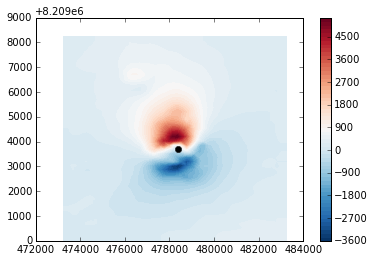

In [39]:
plt.tricontourf(y, x, anom, 60, cmap='RdBu_r')
plt.colorbar()
plt.plot(solver.estimate_[1], solver.estimate_[0], 'ok')

## Desafio: Varie o indice estrutural 

Rode com os indices `[1, 2, 3]` e faça um gráfico de índice pelo z estimado.

In [41]:
zs = []
indices = [1, 2, 3]
for index in indices:
    solver = euler.Classic(x, y, z, anom, dx, dy, dz, index).fit()
    zs.append(solver.estimate_[2])

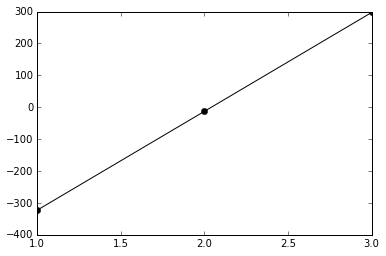

In [44]:
plt.plot(indices, zs, 'o-k')

## Várias soluções usando janelas

In [46]:
solver = euler.Classic(x, y, z, anom, dx, dy, dz, 3)
janela = euler.MovingWindow(solver, (10, 10), (3000, 3000))
janela.fit()

In [47]:
janela.estimate_

array([[  8.21267242e+06,   4.78404333e+05,   2.97470592e+02],
       [  8.21271620e+06,   4.78432964e+05,   2.91361658e+02],
       [  8.21269088e+06,   4.78437339e+05,   2.98280877e+02],
       [  8.21273167e+06,   4.78463961e+05,   2.89548029e+02],
       [  8.21267683e+06,   4.78432362e+05,   3.04096147e+02],
       [  8.21269270e+06,   4.78492369e+05,   3.03560771e+02],
       [  8.21286906e+06,   4.78339994e+05,   2.22572108e+02],
       [  8.21288085e+06,   4.78495145e+05,   2.35480749e+02],
       [  8.21272081e+06,   4.78431080e+05,   2.97863050e+02],
       [  8.21275782e+06,   4.78475454e+05,   2.89179640e+02],
       [  8.21272231e+06,   4.78480239e+05,   3.05989884e+02],
       [  8.21281931e+06,   4.78434645e+05,   1.91245470e+02],
       [  8.21273871e+06,   4.78393675e+05,   2.98766710e+02],
       [  8.21278283e+06,   4.78438265e+05,   2.87653186e+02],
       [  8.21283528e+06,   4.78509447e+05,   1.88721784e+02],
       [  8.21289363e+06,   4.78471992e+05,   2.7010085

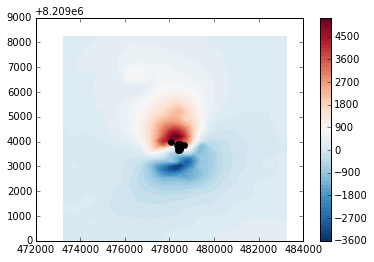

In [51]:
plt.tricontourf(y, x, anom, 60, cmap='RdBu_r')
plt.colorbar()
plt.plot(janela.estimate_[:, 1], janela.estimate_[:, 0], 'ok')

<matplotlib.colorbar.Colorbar instance at 0x7fa4aed59cf8>

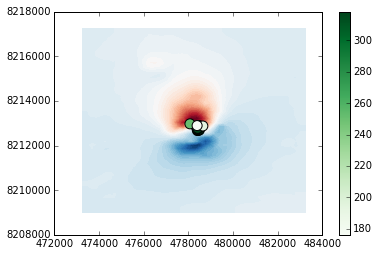

In [55]:
plt.tricontourf(y, x, anom, 60, cmap='RdBu_r')
plt.scatter(janela.estimate_[:, 1], janela.estimate_[:, 0], s=100, c=janela.estimate_[:, 2], cmap="Greens")
plt.colorbar()

## Desafio: Faça a  redução ao polo

In [16]:
inc, dec = -19.5, -18.5

In [22]:
polo = transform.reduce_to_pole(x, y, anom, shape, inc, dec, inc, dec)

<matplotlib.colorbar.Colorbar instance at 0x7fa4d27d1ab8>

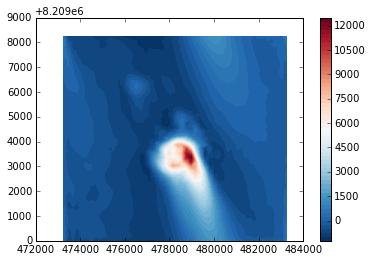

In [23]:
plt.tricontourf(y, x, polo, 60, cmap='RdBu_r')
plt.colorbar()

## Desafio: Estime a direção de magnetização e reduza ao polo de novo

In [56]:
from fatiando.gravmag import magdir

In [57]:
solver = euler.Classic(x, y, z, anom, dx, dy, dz, structural_index=3).fit()

In [60]:
direcao = magdir.DipoleMagDir(x, y, z, anom, inc, dec, [solver.estimate_])

In [61]:
direcao.fit()

In [62]:
direcao.estimate_

[[3020.039200550887, -65.23542375873528, -11.129862323078324]]

In [64]:
sinc, sdec = direcao.estimate_[0][1:]

In [65]:
polo = transform.reduce_to_pole(x, y, anom, shape, inc, dec, sinc, sdec)

<matplotlib.colorbar.Colorbar instance at 0x7fa4adfb7320>

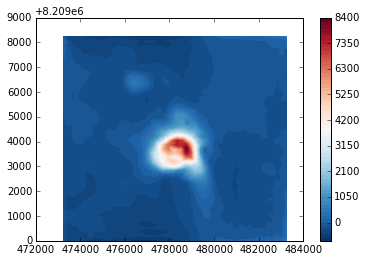

In [66]:
plt.tricontourf(y, x, polo, 60, cmap='RdBu_r')
plt.colorbar()